## AI CA

GitHub - https://github.com/Rfg2048/AI

## A1 - Identify the differences between a graph and a tree.

According to Cambridge Dictionary a graph is a picture that shows  how two sets of information or variables are related, usually by lines or curves, and a tree diagram shows the relationships between different pieces of information using lines that are connected and have different branches.

One of the main differences between graph and tree is the structure cycle, while graph can be connnected or disconnected, have cycles or loops and doesn't necessarily have a root node, the tree structure cycle relies on a single root node which is connected and acyclic (graph with no graph cycles).

While a graph can havy any number of edges directed or undirected, trees may only have $n$ being nodes, $n-1$ number of edges and they are always directed. Graphs are used normally to model complex systems or relationships, like social networks or computer networks. Trees are used to represent data with hierachy structure, such as dile systems pr organization charts.



## A2 - Explain in detail how the graph is an abstraction of the problem.

In [2]:
import heapq


def calculate_distances(graph, starting_vertex):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0

    pq = [(0, starting_vertex)]
    while len(pq) > 0:
        current_distance, current_vertex = heapq.heappop(pq)

        # Nodes can get added to the priority queue multiple times. We only
        # process a vertex the first time we remove it from the priority queue.
        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # Only consider this new path if it's better than any path we've
            # already found.
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

#Line of code provided in-class called Dijkstra's Algorithm used to determine the shortest path

In [3]:
fig1_graph = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5},
 }

In [80]:
cut_graph = {
    'A': {'B': 1, 'C': 5},
    'B': {'A': 1, 'C': 2},
    'C': {'A': 5, 'B': 2},
    'D': {'B': 4},
    'E': {'D': 4, 'F': 3},
    'F': {'D': 7,'G': 2},
    'G': {'C': 1},
    'H': {'A': 2},
    'K': {'H': 5},
    'W': {'E': 6},
}

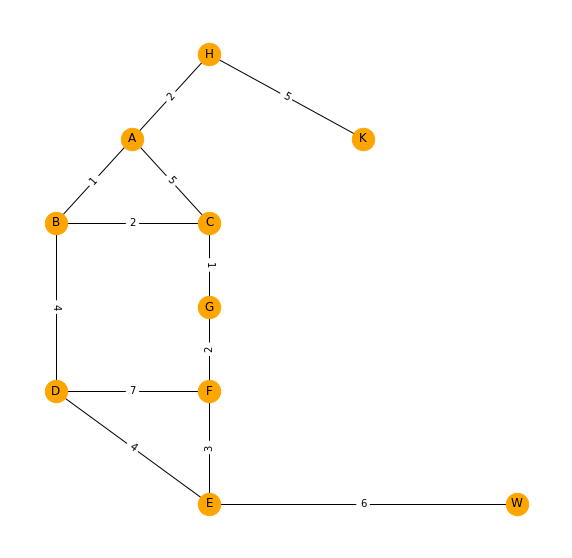

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()

#loop to create nodes and edges
for node, neighbors in cut_graph.items():
    graph.add_node(node)
    for neighbor, weight in neighbors.items():
        graph.add_edge(node, neighbor, weight=weight)

#Setting fixed position for the nodes to create a replica of figure given

fix_node_position = {
    'A': (0.5,1.5),
    'B':(0,0),
    'C':(1,0),
    'D':(0,-3),
    'E':(1,-5),
    'F':(1, -3),
    'G':(1,-1.5),
    'H':(1,3),
    'K':(2,1.5),
    'W':(3,-5)
}

plt.figure(figsize=(10,10))

pos = fix_node_position

#Drawing nodes and edges with letters and weight using networkx library
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color = "orange")
nx.draw_networkx_edges(graph,pos)
node_label = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos, labels=node_label)
edge_label = {(u,v): d['weight'] for u,v,d in graph.edges(data=True)}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_label)

plt.axis('off')
plt.show()

In [21]:
print(calculate_distances(fig1_graph,'A'))

NameError: name 'calculate_distances' is not defined

From the output, using Dijkstra's algorithm it displays the shortest distance to every node in the graph, but in the scenario given the goal is to reach to the solution (Node S) which is 17

## References

GeekforGeeks(2023)'Graph Data Structure And Algorithms' Available at: https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/?ref=lbp (Accessed: 22 October 2023).

Tableau(2003-2023)'What Is Data Visualization? Definition, Examples, And Learning Resources' Available at: https://www.tableau.com/learn/articles/data-visualization (Accessed: 22 October 2023).

Cambridge Dictionaty(2023) Available at: https://dictionary.cambridge.org/ (Accessed: 22 October 2023).

Matplotlib(2012-2023)'Matplotlib 3.8.0 documentation' Available at: https://matplotlib.org/stable/ (Accessed: 22 October 2023).

Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008